***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.3 The Visibility Function](4_3_The_Visibility_Function.ipynb)
    * Next: [4.4.2 UV Coverage: The N-element Interferometer](4_4_2_UV_Coverage_The_N-element_Interferometer.ipynb)

***

Main author: Julien Girard

In [59]:
from IPython.core.display import HTML
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotBL
import numpy as np
%matplotlib nbagg

styles = open("../style/course.css", "r").read()
HTML(styles)


---
# Outline

### 4.4.1 UV Tracks

* 4.4.1.A Projection of the baseline with time: the UV track

* 4.4.1.B Special cases

* 4.4.1.C Sampling the visibility function with a UV track


---

---

---


### 4.4.1.A The projected baseline with time: the UV track

Projection of the baseline with time: the UV track
    - Variation of the projected baseline the baseline as seen from the source
    - Motion in the (u,v) plane / equation of ellipse

#### 4.4.1.A.1 The baseline as seen from the source

In [60]:
ant1 = np.array([-500e3,500e3,0])
ant2 = np.array([500e3,-500e3,+10])

Let's express the baseline in ENU coordinates:

In [61]:
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))
print str(D/1000)+" km"

1414.21356241 km


Latitude of the interferometer: $L_a=+45^\circ00'00''$

In [62]:
L = (np.pi/180)*(45+0./60+0./3600)      # Latitude

In [63]:
A=np.arctan2(b_ENU[0],b_ENU[1])
print "Baseline Azimuth="+str(np.degrees(A))+"°"

E=np.arcsin(b_ENU[2]/D)
print "Baseline Elevation="+str(np.degrees(E))+"°"

Baseline Azimuth=135.0°
Baseline Elevation=0.000405142342264°


#### 4.4.1.A.2 Coordinates in the ($u$,$v$,$w$) plane

<IPython.core.display.Javascript object>


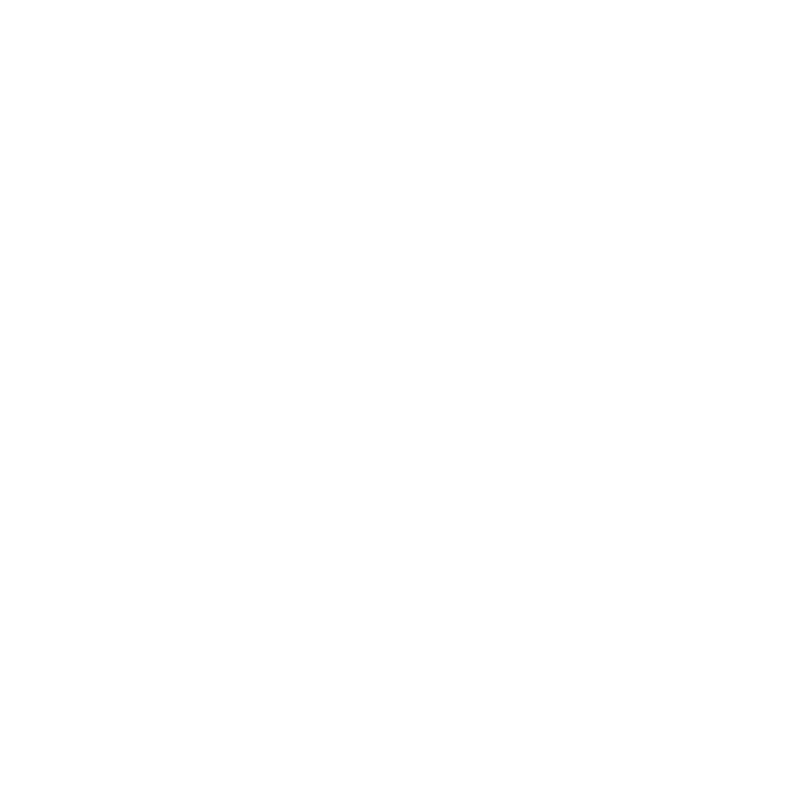

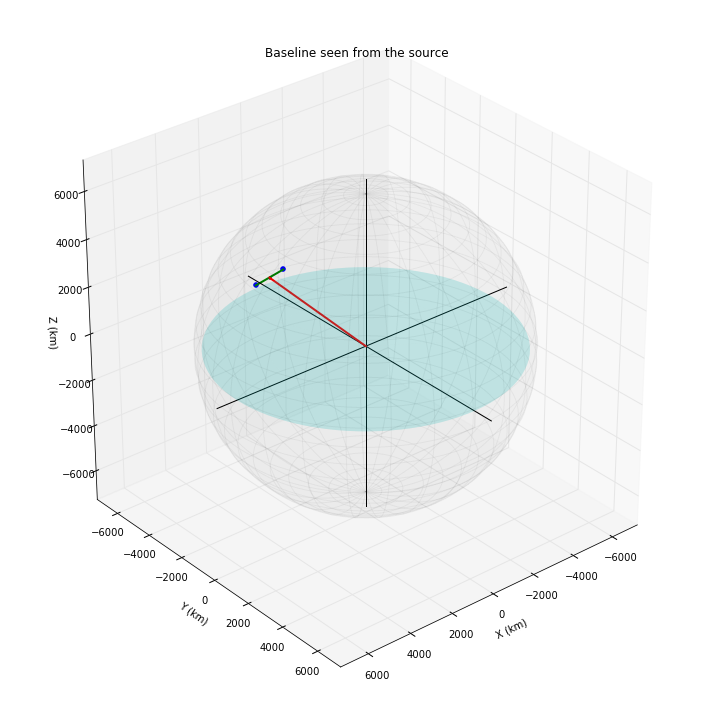

In [64]:
%matplotlib nbagg
plotBL.sphere(ant1,ant2,A,E,D,L)


In section 4.1, we linked the equatorial coordinates of the baseline to the ($u$,$v$,$w$) space through the transformation matrix:
\begin{equation}
\begin{pmatrix}
u\\
v\\
w
\end{pmatrix}
=
\frac{1}{\lambda}
\begin{pmatrix}
\sin H_0 & \cos H_0 & 0\\ 
-\sin \delta_0 \cos H_0 & \sin\delta_0\sin H_0 & \cos\delta_0\\
\cos \delta_0 \cos H_0 & -\cos\delta_0\sin H_0 & \sin\delta_0\\
\end{pmatrix} 
\begin{pmatrix}
X\\
Y\\
Z
\end{pmatrix}
\end{equation}

Let Ant$_1$ and Ant$_2$ two antennas:

\begin{equation}
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix}
=|\mathbf{b}|
\begin{bmatrix}
\cos L_a \sin E - \sin L_a \cos E \cos A\nonumber\\ 
\cos E \sin A \nonumber\\
\sin L_a \sin E + \cos L_a \cos E \cos A\\
\end{bmatrix}
\end{equation}


** Expression of $\mathcal{b}$ in ($A$,$E$) and in the ($X$,$Y$,$Z$) systems**

**Observation parameters**

Latitude of the baseline: $L_a=-30^\circ43'17.34''$

Declination of the observation: $\delta=-74^\circ39'37.481''$

Duration of observation: $\Delta \text{HA}=[-4^\text{h},4^\text{h}]$

Time steps: 600

Frequency: 1420 MHz

In [65]:
%matplotlib nbagg
# Observation parameters
c=3e8                                         # Speed of light
f=1420e9                                      # Frequency
lam = c/f                                     # Wavelength 
#dec = (np.pi/180)*(-74-39.0/60-37.481/3600)   # Declination
dec = (np.pi/180)*(-30-43.0/60-17.34/3600)   # Declination

time_steps = 600                              # time steps
h = np.linspace(-4,4,num=time_steps)*np.pi/12 # Hour angle window

In [66]:
ant1 = np.array([25.095,-9.095,0.045])
ant2 = np.array([90.284,26.380,-0.226])
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))
L = (np.pi/180)*(-30-43.0/60-17.34/3600)

A=np.arctan2(b_ENU[0],b_ENU[1])
print A*(180/np.pi)
E=np.arcsin(b_ENU[2]/D)
print E*(180/np.pi)

X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))

61.4455465958
-0.209213555573


** Computation of the projected baselines in ($u$,$v$,$w$) coordinates along the observing time**

As the $u$, $v$, $w$ coordinates depends explicitely on $H$, we must evaluate them for each time step of the observation.

$\lambda u = X \sin H + Y \cos H$

$\lambda v= -X \sin \delta \cos H + Y \sin\delta\sin H + Z \cos\delta$

$\lambda w= X \cos \delta \cos H -Y \cos\delta\sin H + Z \sin\delta$

In [67]:
u = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
v = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
w = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

The $uvw$-track of the baseline over the 8 hour observation period.

    - dependence of baseline length
    - Latitude of observation
    - General case (tracks are ellipsis)
    - parameters of the ellipsis

<IPython.core.display.Javascript object>


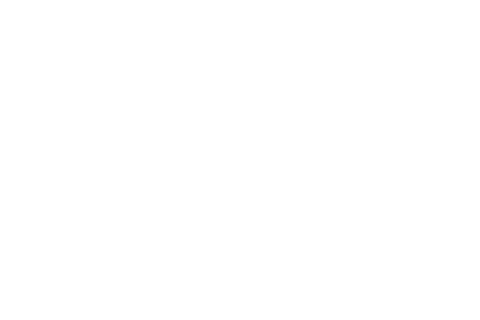

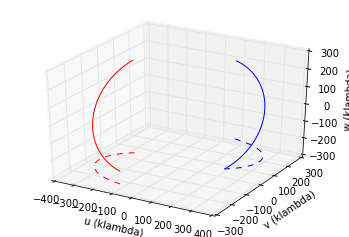

In [68]:
plotBL.UV(u,v,w)

The $uv$-track projected in the $uv$ plane.

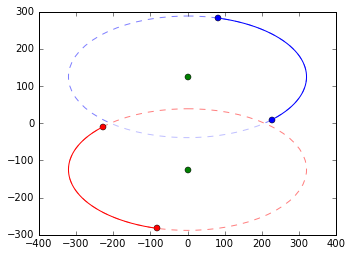

In [69]:
%matplotlib inline
from matplotlib.patches import Ellipse

# parameters of the UVtrack as an ellipse
a=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
b=a*np.sin(dec)              # minor axi
v0=Z/lam*np.cos(dec)/1e3     # center of ellipse

plotBL.UVellipse(u,v,w,a,b,v0)

One can note that in this particular case, the $uv$ tracks draw an ellipsis.
This can be easily derived from the combination of the equation of $u$ and $v$:


$$\boxed{u^2 + \left[ \frac{v -\frac{Z}{\lambda} \cos \delta}{\sin \delta} \right]^2 = \left[ \frac{X}{\lambda} \right]^2 + \left[ \frac{Y}{\lambda} \right]^2}$$

This is the equation of an ellipse centered at $(0,\frac{Z}{\lambda} \cos \delta)$ in the ($u$,$v$) plane, with a major axis of 

$a=\frac{\sqrt{X^2 + Y^2}}{\lambda}$. The minor axis along the axis $v$ will be a function of $Z$, $\delta$ and $a$.

(Derivation in Appendix A.3 [EXREF])

The blue (resp. the red) curve is the $uv$ track of the baseline $\mathbf{b}_{12} (resp. \mathbf{b}_{21}$). As $I_\nu$ is real, the real part of $V$ is even and the imaginary part if odd making $V(-u,-v)=V^*$. It implies that one baseline provide a measurement of its complex conjugate for free at (-u,-v).

### 4.4.1.B Special cases

#### 4.4.1.B.1 The Polar interferometer

Let settle one baseline at the North pole. The local zenith corresponds to the North Celestial Pole at $\delta=90^\circ$. As seen from the NCP, the baseline will rotate and the projected baseline will corresponds to the physical baseline. This is the only case where it is happening.

If $\mathbf{b}$ rotates, we can guess that the $uv$ tracks will be perfect circles. Let's verify that.

In [70]:
L=np.radians(90.)
ant1 = np.array([25.095,-9.095,0.045])
ant2 = np.array([90.284,26.380,-0.226])
b_ENU = ant2-ant1
D = np.sqrt(np.sum((b_ENU)**2))

A=np.arctan2(b_ENU[0],b_ENU[1])
print A*(180/np.pi)
E=np.arcsin(b_ENU[2]/D)
print E*(180/np.pi)

X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))

61.4455465958
-0.209213555573


Let's compute the uv tracks when observing the NCP ($\delta=90^\circ$):

In [71]:
dec=np.radians(90.)

uNCP = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
vNCP = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
wNCP = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

# parameters of the UVtrack as an ellipse
aNCP=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
bNCP=aNCP*np.sin(dec)              # minor axi
v0NCP=Z/lam*np.cos(dec)/1e3     # center of ellipse

Let's compute the uv tracks when observing a source at $\delta=30^\circ$:

In [72]:
dec=np.radians(30.)

u30 = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
v30 = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
w30 = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

a30=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
b30=a*np.sin(dec)              # minor axi
v030=Z/lam*np.cos(dec)/1e3     # center of ellipse

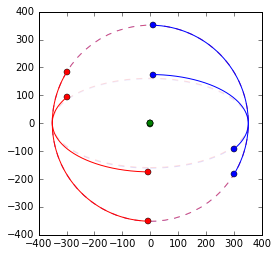

In [73]:
%matplotlib inline
plotBL.UVellipse(u30,v30,w30,a30,b30,v030)

plotBL.UVellipse(uNCP,vNCP,wNCP,aNCP,bNCP,v0NCP)

When observing a source at declination $\delta$, we have an elliptical shape but centered at (0,0). In the case of a polar interferometer, the full $uv$ track can be covered in 12 hours thanks to the fact that we are also sampling over a symmetric uv track.

#### 4.4.1.B.2 The Equatorial interferometer

In [74]:
L=np.radians(90.)
X = D*(np.cos(L)*np.sin(E)-np.sin(L)*np.cos(E)*np.cos(A))
Y = D*np.cos(E)*np.sin(A)
Z = D*(np.sin(L)*np.sin(E)+np.cos(L)*np.cos(E)*np.cos(A))


# At local zenith == Celestial Equator
dec=np.radians(0.)

uEQ = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
vEQ = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
wEQ = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

# parameters of the UVtrack as an ellipse
aEQ=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
bEQ=aEQ*np.sin(dec)              # minor axi
v0EQ=Z/lam*np.cos(dec)/1e3     # center of ellipse

# Close to Zenith
dec=np.radians(10.)

u10 = lam**(-1)*(np.sin(h)*X+np.cos(h)*Y)/1e3
v10 = lam**(-1)*(-np.sin(dec)*np.cos(h)*X+np.sin(dec)*np.sin(h)*Y+np.cos(dec)*Z)/1e3
w10 = lam**(-1)*(np.cos(dec)*np.cos(h)*X-np.cos(dec)*np.sin(h)*Y+np.sin(dec)*Z)/1e3

a10=np.sqrt(X**2+Y**2)/lam/1e3 # major axis  
b10=a*np.sin(dec)              # minor axi
v010=Z/lam*np.cos(dec)/1e3     # center of ellipse

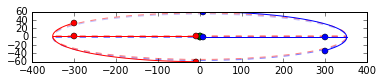

In [75]:
%matplotlib inline
plotBL.UVellipse(u10,v10,w10,a10,b10,v010)

plotBL.UVellipse(uEQ,vEQ,wEQ,aEQ,bEQ,v0EQ)

An equatorial interferometer observing at zenith will see radiosources crossing the sky on straight line paths. Therefore, they will produce straight $uv$ coordinates.

#### 4.4.1.B.3 The East-West array <a id='vis:sec:ew'></a> <!--\label{vis:sec:ew}-->

The East-West array is a specific case of interferometer where the physical baseline is align with the ground East-West direction. They provide the property of giving a $uv$ coverage fully included on a plane.

If the baseline is aligned with the East-West direction, then the Elevation $E$ of the baseline is zero and the Azimuth $A$ is $\frac{\pi}{2}$. Equation A simplifies as follow:

Only the $Y$ component of the baseline will be non zero.

\begin{equation}
\frac{1}{\lambda}
\begin{bmatrix}
X\\
Y\\
Z
\end{bmatrix}
=
|\mathbf{b_\lambda}|
\begin{bmatrix}
\cos L_a \sin 0 - \sin L_a \cos 0 \cos \frac{\pi}{2}\nonumber\\ 
\cos 0 \sin \frac{\pi}{2} \nonumber\\
\sin L_a \sin 0 + \cos L_a \cos 0 \cos \frac{\pi}{2}\\
\end{bmatrix}
=
\begin{bmatrix}
0\\
|\mathbf{b_\lambda}|\\
0 \\
\end{bmatrix}
\end{equation}

If we observe a source at declination $\delta_0$ but with varying Hour Angle, $H$, we will have the following relation:

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
\sin H & \cos H & 0\\ 
-\sin \delta_0 \cos H & \sin\delta_0\sin H & \cos\delta_0\\
\cos \delta_0 \cos H & -\cos\delta_0\sin H & \sin\delta_0\\
\end{pmatrix} 
\begin{pmatrix}
0\\
|\mathbf{b_\lambda}| \\
0
\end{pmatrix}
\end{equation}

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
|\mathbf{b_\lambda}| \cos H \\ 
|\mathbf{b_\lambda}| \sin\delta_0 \sin H\\
-|\mathbf{b_\lambda}|\cos\delta_0\sin H\\
\end{pmatrix} 
\end{equation}

when $H = 6^\text{h}$ (West)

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 
|\mathbf{b_\lambda}|\sin\delta_0\\
|\mathbf{b_\lambda}|\cos\delta_0\\
\end{pmatrix} 
\end{equation}

when $H = 0^\text{h}$ (South)
\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
|\mathbf{b_\lambda}| \\ 
0\\
0\\
\end{pmatrix} 
\end{equation}

when $H = -6^\text{h}$ (East)

\begin{equation}
\begin{pmatrix}
u\\
v\\
w\\
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 
-|\mathbf{b_\lambda}|\sin\delta_0\\
-|\mathbf{b_\lambda}|\cos\delta_0
\end{pmatrix} 
\end{equation}

In this case, one case notice that we always have a relationship between $u$, $v$ and $|\mathbf{b_\lambda}|$:

$$ u^2+\left( \frac{v}{\sin\delta_0}\right) ^2=|\mathbf{b_\lambda}|^2$$ 

<div class=warn>
**Warning:** The $\sin\delta_0$ factor appearing in Eq., can be interpreted as a compression factor.
</div>

####  In the Equatorial $XYZ$ space

This relation is independent of $H$

DEVELOP

<div class=advice>
**Note:** All $uv$ tracks are contained in a plane (no need for W-projection, but just a correction between the $uv$ plane and the $XY$ plane
</div>

### 4.4.1.C Sampling the visibility plane with UV tracks

#### A) Simulating a baseline

When we have and EW baseline things simplify. Firstly: $XYZ = [0~d~0]^T$, where $d$ is the baseline length measured in wavelengths.
Moreover, we have that:
* $u = d\cos(H)$,
* $v = d\sin(H)\sin(\delta)$,

where $H$ is the hour angle of the field center and $\delta$ its declination. In this section we will be plotting the $uv$-coverage of an EW-baseline whose field center is at two different declinations.

In [76]:
H = np.linspace(-6,6,600)*(np.pi/12) #Hour angle in radians
d = 100 #We assume that we have already divided by wavelength

delta = 60*(np.pi/180) #Declination in degrees
u_60 = d*np.cos(H)
v_60 = d*np.sin(H)*np.sin(delta)

#### B) Simulating a sky

Here we have a couple of sources given in RA ($\alpha$) and DEC ($\delta$):
* Source 1: (5h 32m 0.4s,60$^{\circ}$-17' 57'') - 1Jy
* Source 2: (5h 36m 12.8s,-61$^{\circ}$ 12' 6.9'') - 0.5Jy
* Source 3: (5h 40m 45.5s,-61$^{\circ}$ 56' 34'') - 0.2Jy

The field center is located at $(\alpha_0,\delta_0) = $ (5h 30m,60$^{\circ}$).  

In [77]:
RA_sources = np.array([5+30.0/60,5+32.0/60+0.4/3600,5+36.0/60+12.8/3600,5+40.0/60+45.5/3600])
DEC_sources = np.array([60,60+17.0/60+57.0/3600,61+12.0/60+6.9/3600,61+56.0/60+34.0/3600])
Flux_sources_labels = np.array(["","1 Jy","0.5 Jy","0.2 Jy"])
Flux_sources = np.array([1,0.5,0.1]) #in Jy
step_size = 200
print "Phase center     Source 1     Source 2     Source3"
print repr("RA="+str(RA_sources)).ljust(2)
print "DEC="+str(DEC_sources)

Phase center     Source 1     Source 2     Source3
'RA=[ 5.5         5.53344444  5.60355556  5.67930556]'
DEC=[ 60.          60.29916667  61.20191667  61.94277778]


Recall that we can convert RA/DEC to $lm$ with
* $l = \cos \delta \sin \Delta \alpha$
* $m = \sin \delta\cos\delta_0 -\cos \delta\sin\delta_0\cos\Delta \alpha$
* $\Delta \alpha = \alpha - \alpha_0$

In [78]:
RA_rad = np.array(RA_sources)*(np.pi/12)
DEC_rad = np.array(DEC_sources)*(np.pi/180)
RA_delta_rad = RA_rad-RA_rad[0]

l = np.cos(DEC_rad)*np.sin(RA_delta_rad)
m = (np.sin(DEC_rad)*np.cos(DEC_rad[0])-np.cos(DEC_rad)*np.sin(DEC_rad[0])*np.cos(RA_delta_rad))
print l*(180/np.pi)
print m*(180/np.pi)

[ 0.          0.24855826  0.74818685  1.26458942]
[ 0.          0.30010768  1.21061225  1.96811494]


The coordinates of the sources and the phase center are now in degrees.

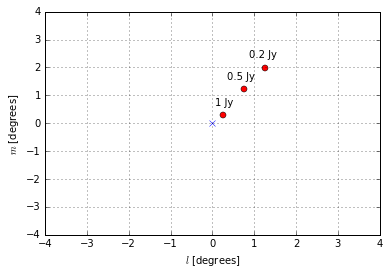

In [79]:
%matplotlib inline
fig = plt.figure()
ax = fig.add_subplot(111)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel("$l$ [degrees]")
plt.ylabel("$m$ [degrees]")
plt.plot(l[0],m[0],"bx")
plt.hold("on")
plt.plot(l[1:]*(180/np.pi),m[1:]*(180/np.pi),"ro") 
counter = 1
for xy in zip(l[1:]*(180/np.pi)+0.25, m[1:]*(180/np.pi)+0.25):                                              
    ax.annotate(Flux_sources_labels[counter], xy=xy, textcoords='offset points',horizontalalignment='right',
                verticalalignment='bottom')  
    counter = counter + 1
        
plt.grid()

In [80]:
point_sources = np.zeros((len(RA_sources)-1,3))
point_sources[:,0] = Flux_sources
point_sources[:,1] = l[1:]
point_sources[:,2] = m[1:]

#### C) Simulating an observation

We will now be creating a completely filled in $uv$-plane and sample it on the EW-baseline track we created in the first section. We will be ignoring the $w$-term for the sake of simplicity.

In [81]:
u = np.linspace(-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10, num=step_size, endpoint=True)
v = np.linspace(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10, num=step_size, endpoint=True)   
uu, vv = np.meshgrid(u, v)
zz = np.zeros(uu.shape).astype(complex)

We create the dimensions of our visibility plane.

In [82]:
s = point_sources.shape
for counter in xrange(1, s[0]+1):
    A_i = point_sources[counter-1,0]
    l_i = point_sources[counter-1,1]
    m_i = point_sources[counter-1,2]
    zz += A_i*np.exp(-2*np.pi*1j*(uu*l_i+vv*m_i))
zz = zz[:,::-1]

We create our completely filled in visibitly plane. If we had a perfect interferometer we could sample the entire $uv$-plane, but due to the fact that we have only a finite amount of antennas this is not possible. Recall that our sky brightness $I(l,m)$ is related to to our visibilites $V(u,v)$ via the Fourier transform. For a bunch of point sources we can therefore write:

$V(u,v)=\mathcal{F}\{I(l,m)\} = \mathcal{F}\{\sum_k A_k \delta(l-l_k,m-m_k)\} = \sum_k A_k e^{-2\pi i (ul_i+vm_i)}$.

In [83]:
u_track = u_60
v_track = v_60
z = np.zeros(u_track.shape).astype(complex)       

s = point_sources.shape
for counter in xrange(1, s[0]+1):
    A_i = point_sources[counter-1,0]
    l_i = point_sources[counter-1,1]
    m_i = point_sources[counter-1,2]
    z += A_i*np.exp(-1*2*np.pi*1j*(u_track*l_i+v_track*m_i))

Here we sample our visibility plane on the $uv$-track derived in the first section, i.e. $V(u_t,v_t)$.

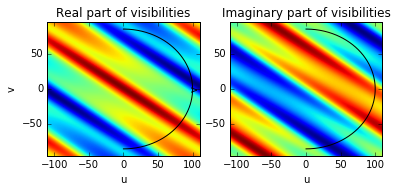

In [84]:
plt.subplot(121)
plt.imshow(zz.real,extent=[-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10,-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Real part of visibilities")

plt.subplot(122)
plt.imshow(zz.imag,extent=[-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10,-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Imaginary part of visibilities")

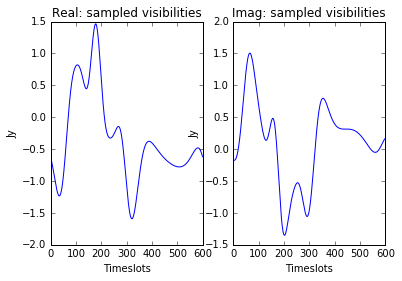

In [85]:
plt.subplot(121)
plt.plot(z.real)
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Real: sampled visibilities")

plt.subplot(122)
plt.plot(z.imag)
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Imag: sampled visibilities")

We now plot the sampled visibilites as a function of time-slots, i.e $V(u_t(t_s),v_t(t_s))$.

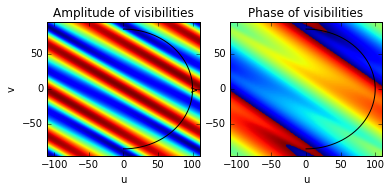

In [86]:
plt.subplot(121)
plt.imshow(abs(zz),extent=[-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10,-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Amplitude of visibilities")

plt.subplot(122)
plt.imshow(np.angle(zz),extent=[-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10,-1*(np.amax(abs(v_60)))-10, 
                                np.amax(abs(v_60))+10])
plt.plot(u_60,v_60,"k")
plt.xlim([-1*(np.amax(np.abs(u_60)))-10, np.amax(np.abs(u_60))+10])
plt.ylim(-1*(np.amax(abs(v_60)))-10, np.amax(abs(v_60))+10)
plt.xlabel("u")
plt.ylabel("v")
plt.title("Phase of visibilities")

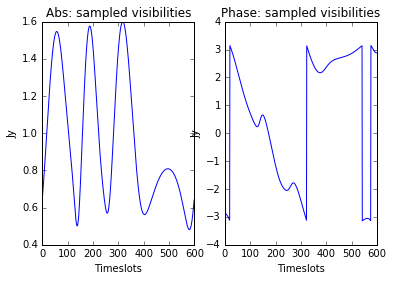

In [87]:
plt.subplot(121)
plt.plot(abs(z))
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Abs: sampled visibilities")

plt.subplot(122)
plt.plot(np.angle(z))
plt.xlabel("Timeslots")
plt.ylabel("Jy")
plt.title("Phase: sampled visibilities")

#### *Real-life* visibility

In the following figure, we present a collection of visibility measurements taken with different baselines, as a function of time. These measurements come from a real LOFAR dataset observing Cygnus A, a powerful radiosource.
Each color corresponds to a different baseline measurement, and consequently, a different sampling of the same visibility function along different uv-track.

<img src='figures/cygnusA.jpg' width=30%>

<div align="center">**Figure 1**: The source Cygnus A at 21 cm<br>
</div>

<img src='figures/baselines.jpg' width=70%>

<div align="center">**Figure 2**: Visibility amplitude as a function of time<br>
</div>

<img src='figures/baseline-uvdist.jpg' width=70%>

<div align="center">**Figure 3**: Visibility amplitude as a function of $r_{uv}$<br>
</div>

The second plot is the same dataset but this time, represented as the amplitude of the visibility as a function of $r_{uv}$. Under this form, it should be quite clear that, as in sect. 4.3, we have a stacking of the radial plot of the visibility function. In this case, we can guess the 2D-shape of the visibility function through the sampling.

Therefore, one can instantaneously understand that the larger number of different baselines we have, the more complete the sampling of the visibility function of the source will be.

This is the topic of the next section.

<p class=conclusion>
  <font size=4> **Important things to remember**</font>
  <br>
  <br>
  
&bull; During an observation, the trajectories in $uv$ plane are ellipse which parameters depends on the latitude, declination of observation<br><br>
&bull; $uv$ tracks samples the complex visibilities along elliptical paths. 
&bull; The East-West array. TO FILL
</p>

---
* [Go back up](#beginning) <!--\ref{beginning}--> 
* Or continue to next section: [4.4.2 UV Coverage: Improving your coverage -->](4_4_2_UV_Coverage_Improving_Your_Coverage.ipynb)
---